In [1]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
from utils.preprocessing import create_time_matrix, create_caregivers_df, create_tasks_df, create_clients_df

caregivers = create_caregivers_df('data/raw/caregivers.csv')

tasks = create_tasks_df('data/raw/hemtjanst_tasks.csv', only_client_tasks=True)

clients = create_clients_df('data/raw/clients.csv')

drive_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_DRIVE.csv')
walk_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_WALK.csv')
bicycle_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_BICYCLE.csv')

In [2]:
# Subset with only caregivers 33, 949, 1108 and their tasks
subset = [33, 949, 1108]
caregivers_subset = caregivers.loc[subset]
tasks_subset = tasks[tasks['PlannedCaregiverID'].isin(subset)]
client_subset = clients.loc[tasks_subset['ClientID']]
drive_time_matrix_subset = drive_time_matrix.loc[client_subset.index, client_subset.index]
big_M_subset = calculate_big_M(caregivers_subset, tasks_subset, drive_time_matrix_subset)

print(f"Number of caregivers in subset: {len(caregivers_subset)}")
print(f"Number of tasks assigned to subset caregivers: {len(tasks_subset)}")

NameError: name 'calculate_big_M' is not defined

In [ ]:
model_subset, x_subset, t_subset = build_home_care_model_dfbased(caregivers_subset, tasks_subset, clients, drive_time_matrix, big_M_subset)

In [ ]:
model_subset.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2545 rows, 2355 columns and 13722 nonzeros
Model fingerprint: 0x79bd8444
Variable types: 87 continuous, 2268 integer (2268 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+02]
Presolve removed 2386 rows and 1673 columns
Presolve time: 0.05s
Presolved: 159 rows, 682 columns, 1958 nonzeros
Variable types: 6 continuous, 676 integer (676 binary)
Found heuristic solution: objective 1554.3833333

Root relaxation: objective 4.314117e+01, 385 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.14117    0   27 1554.3

In [ ]:
# Subset with only car caregivers
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car']
car_caregiver_ids = car_caregivers.index.tolist()
car_tasks = tasks[tasks['PlannedCaregiverID'].isin(car_caregiver_ids)]
car_clients = clients.loc[car_tasks['ClientID']]
drive_time_matrix_car = drive_time_matrix.loc[car_clients.index, car_clients.index]
big_M_car = calculate_big_M(car_caregivers, car_tasks, drive_time_matrix_car)

print(f"Number of car caregivers: {len(car_caregivers)}")
print(f"Number of tasks assigned to car caregivers: {len(car_tasks)}")

Calculated big M: 1165.1200000000001
- Time horizon: 905
- Max travel time: 34.2
- Max service time: 120
Number of car caregivers: 17
Number of tasks assigned to car caregivers: 155


In [ ]:
model_car, x_car, t_car = build_home_care_model_dfbased(car_caregivers, car_tasks, clients, drive_time_matrix, big_M_car)

In [ ]:
model_car.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 419155 rows, 413729 columns and 2485924 nonzeros
Model fingerprint: 0xe5fc6eda
Variable types: 2669 continuous, 411060 integer (411060 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 411439 rows and 240728 columns
Presolve time: 0.23s
Presolved: 7716 rows, 173001 columns, 523953 nonzeros
Variable types: 34 continuous, 172967 integer (172967 binary)
Performing another presolve...
Presolve removed 2492 rows and 0 columns
Presolve time: 0.61s
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.01s

Barrier statistics:
 Dense cols : 4
 AA' NZ     : 7.814

Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1543 to 1543): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 0): cannot convert the series to <class 'float'>
Error calculating travel time (0 to 1366): cannot convert the series to <class 'float'>
Error calculating travel time (1366 to 0): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 1205): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 1371): cannot convert the series to <class 'float'>
Error calculating travel time (1371 to 1205): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 978): cannot convert the series to <class 'float'>
Error cal

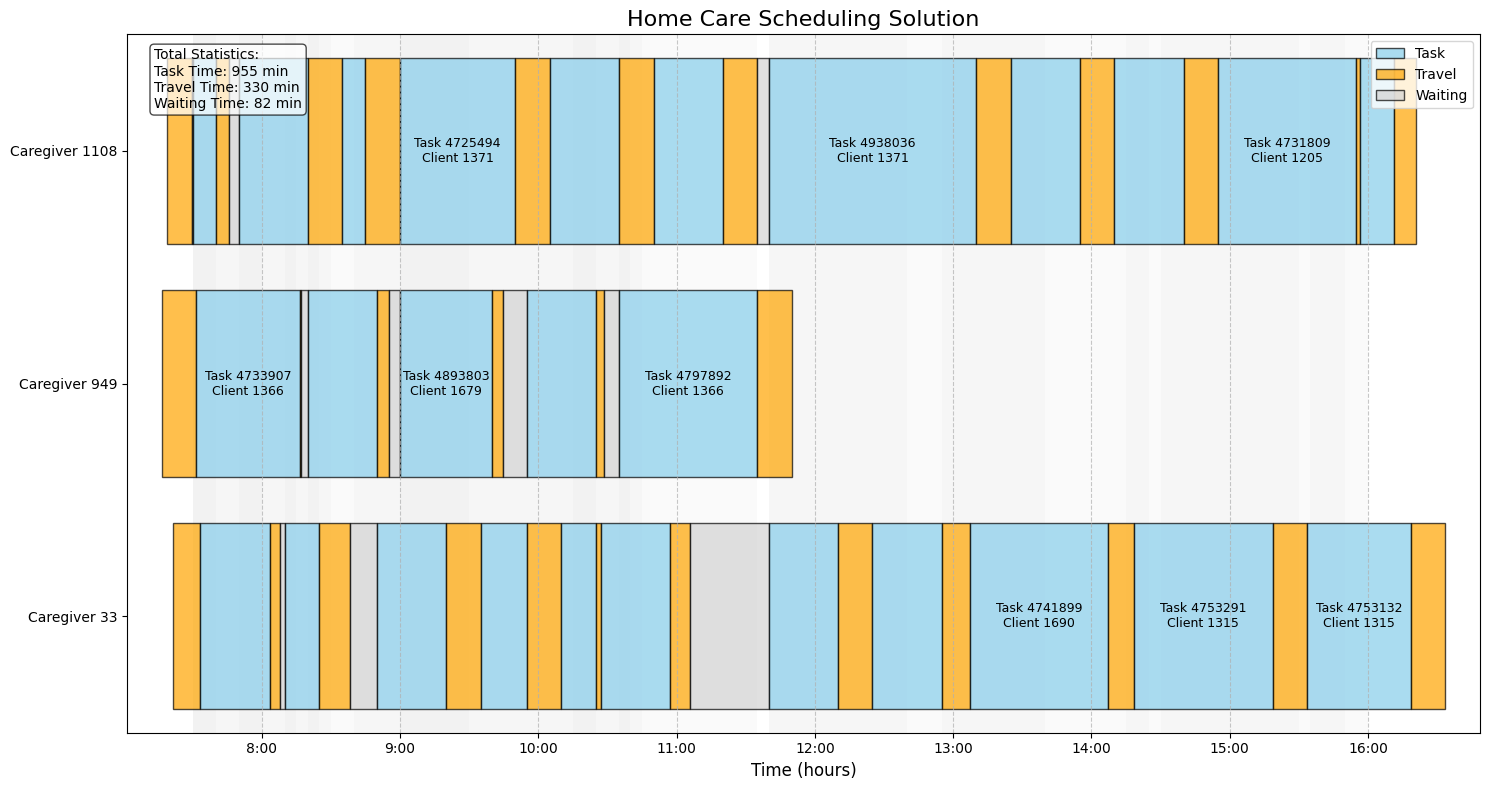

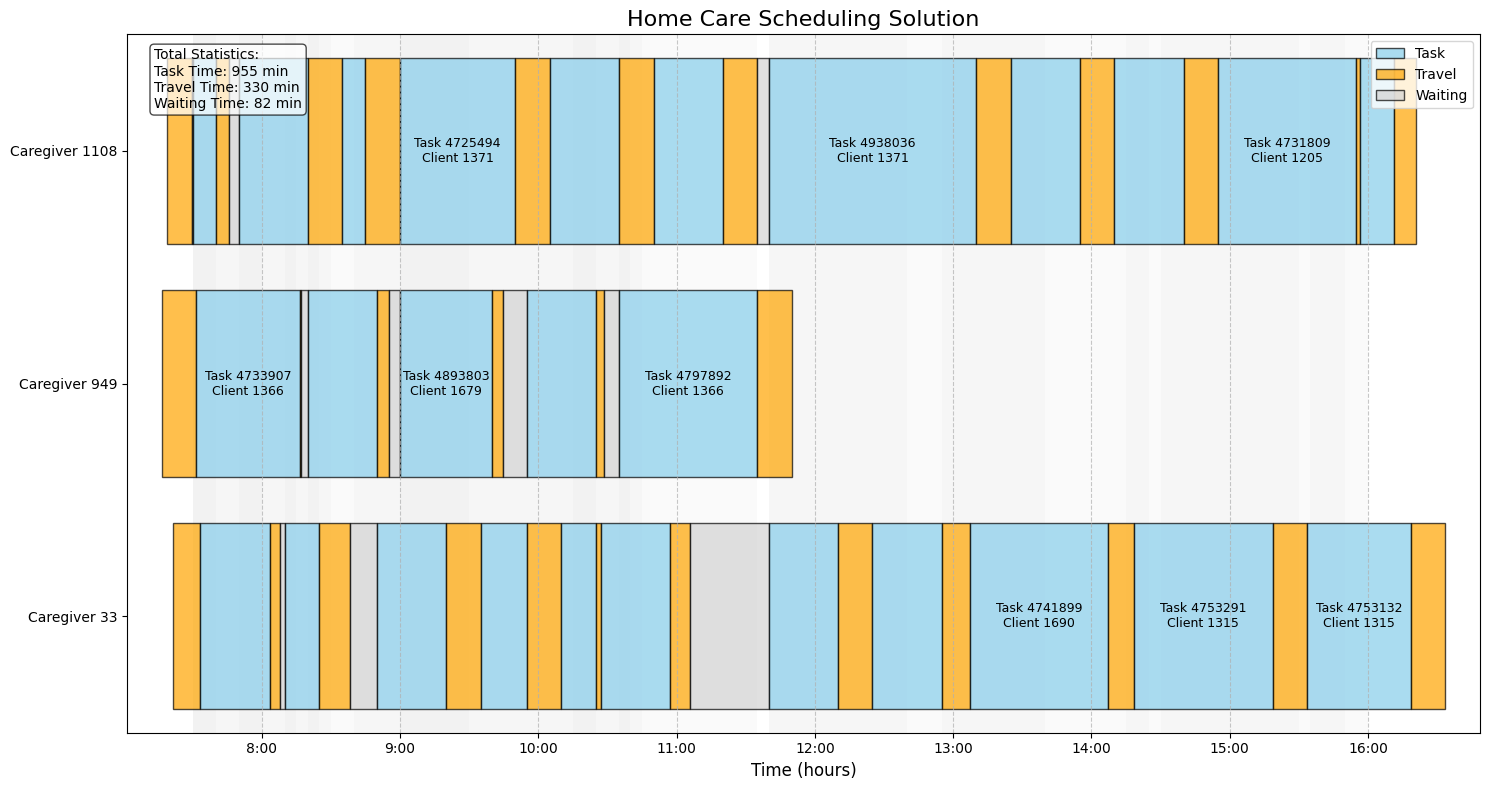

In [ ]:
visualize_home_care_schedule(model_subset, x_subset, t_subset, caregivers_subset, tasks_subset, drive_time_matrix_subset)

In [ ]:
from model_analysis import visualize_home_care_schedule
visualize_home_care_schedule(model_car, x_car, t_car, car_caregivers, car_tasks, drive_time_matrix_car)

IndentationError: expected an indented block after 'for' statement on line 50 (model_analysis.py, line 53)